In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

np.random.seed(12)

class Layer:
    def __init__(self, prevLayer, n_nodes, sigma, simga_d, bias=0.1):
        self.n_nodes = n_nodes
        self.prevLayer = prevLayer

        if isinstance(prevLayer, Layer):
            self.n_weights = prevLayer.n_nodes
        else:
            self.n_weights = prevLayer

        self.init_weights()
        self.init_bias(bias)

        self.sigma = sigma
        self.sigma_d = simga_d

    def init_weights(self):
        self.weights = np.random.randn(self.n_weights, self.n_nodes)

    def init_bias(self, bias):
        self.bias = np.zeros(self.n_nodes) + bias

    def __str__(self):
        return f"{self.z.shape}, {self.weights.shape}, {self.bias.shape}"

    @property
    def get_bias(self):
        return self.bias

    @get_bias.setter
    def get_bias(self, bias):
        self.bias = bias

    @property
    def get_weights(self):
        return self.weights

    @get_weights.setter
    def get_weights(self, weights):
        self.weights = weights

    @property
    def get_z(self):
        return self.z

    @get_z.setter
    def get_z(self, z):
        self.z = z

    @property
    def get_a(self):
        return self.a

    @get_a.setter
    def get_a(self, a):
        self.a = a

class NeuralNetwork:
    def __init__(self, X_data, Y_data, n_layers, n_nodes, sigma, sigma_d, epochs=1000, batch_size=100, eta=0.1, lmbd=0):
        if len(X_data.shape) == 2:
            self.X_data_full = X_data
        else:
            self.X_data_full = X_data.reshape(-1, 1)
        if len(Y_data.shape) == 2:
            self.Y_data_full = Y_data
        else:
            self.Y_data_full = Y_data.reshape(-1, 1)

        self.n_inputs = self.X_data_full.shape[0]
        self.n_features = self.X_data_full.shape[1]
        self.n_outputs = self.Y_data_full.shape[1]
        # if len(X_data.shape) == 2:
        #     self.n_features = X_data.shape[1]
        # else:
        #     self.n_features = 1

        # if len(X_data.shape) == 2:
        #     self.n_outputs = Y_data.shape[1]
        # else:
        #     self.n_outputs = 1
        print(self.n_features)
        #initializing layers
        if isinstance(n_nodes, int):
            self.layers = [Layer(self.n_features, n_nodes, sigma, sigma_d)]
            for i in range(1, n_layers):
                self.layers.append(Layer(self.layers[i-1], n_nodes, sigma, sigma_d))
            # self.output_layer = Layer(self.layers[i-1], self.n_outputs, sigma, sigma_d)
            self.layers.append(Layer(self.layers[n_layers-1], self.n_outputs, sigma, sigma_d))
        else:
            self.layers = [Layer(self.n_features, n_nodes[0], sigma, sigma_d)]
            for i,n in enumerate(n_nodes[1:]):
                self.layers.append(Layer(self.layers[i-1], n, sigma, sigma_d))
            # self.output_layer = Layer(self.layers[i-1], self.n_outputs, sigma, sigma_d)
            self.layers.append(Layer(self.layers[i-1], self.n_outputs, sigma, sigma_d))

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        #self.iterations  = 2000
        self.eta = eta
        self.lmbd = lmbd

    def feedForward(self):
        layer1 = self.layers[0]
        weights = layer1.get_weights
        bias = layer1.get_bias

        #print(self.X_data.shape)
        #print(weights.shape)
        #print(bias.shape)
        #print(np.shape(bias), np.shape(weights), np.shape(self.X_data))
        #z = np.matmul(weights, self.X_data) + bias
        # z = np.matmul(self.X_data, weights) + bias
        # a = [z]
        # layer1.get_a = z
        # for layer in self.layers[1:]:
        #     layer.get_z = z
        #     al = layer.sigma(z)
        #     layer.get_a = al
        #     a.append(al)
        #     z = al

        z = np.matmul(self.X_data, weights) + bias
        layer1.get_z = z
        layer1.get_a = layer1.sigma(z)
        a = [layer1.get_a]

        for layer in self.layers[1:]:
            z = np.matmul(a[-1], layer.get_weights) + layer.get_bias
            layer.get_z = z
            layer.get_a = layer.sigma(z)
            a.append(layer.get_a)

        self.output = a[-1] # (batch_size, nr_of_output_nodes=1), for regression
        #self.a = np.array(a)

    def feedForwardOut(self, X):
        layer1 = self.layers[0]
        weights = layer1.get_weights
        bias = layer1.get_bias

        # print(np.shape(bias), np.shape(weights), np.shape(X.T))
        # z = np.matmul(X.T, weights) + bias
        # print(z.shape, np.matmul(X.T, weights).shape)
        # a = [z]
        # layer1.get_a = z
        # for layer in self.layers[1:]:
        #     layer.get_z = z
        #     al = layer.sigma(z)
        #     layer.get_a = al
        #     a.append(al)
        #     z = al

        z = np.matmul(X, weights) + bias
        #print(z.shape, weights.shape, bias.shape)
        layer1.get_z = z
        layer1.get_a = layer1.sigma(z)
        a = [layer1.get_a]

        for layer in self.layers[1:]:
            weights = layer.get_weights
            bias = layer.get_bias
            z = np.matmul(a[-1], weights) + bias
            #print(z.shape, weights.shape, bias.shape)
            layer.get_z = z
            layer.get_a = layer.sigma(z)
            a.append(layer.get_a)

        return z

    def backProp_(self):
        Y_data = self.Y_data

        error_output = self.output - Y_data
        #print(error_output.shape)
        error = [error_output]

        # gradients for the output layer
        out_layer = self.layers[-1]
        out_weights_grad = np.matmul(layer.prevLayer.get_a.T, error_output)

        outlayer.get_weights = out_layer.get_weights - output_weights_gradient
        out_layer.get_bias = layer.prevLayer.get_bias - self.eta*error_output

        #going through backwards
        for layer in reversed(self.layers[1:]):
            sigma_der = layer.prevLayer.sigma_d(layer.prevLayer.get_z)
            error.append(np.matmul(error[-1], layer.get_weights.T)*sigma_der)
            #error.append(np.sum(error[-1]*layer.prevLayer.get_weights*layer.sigma_d(layer.get_z))) #, axis=?
            #weights_grad = self.eta*np.matmul(error[-1].T, layer.prevLayer.get_a)
            #or
            weights_grad = self.eta*np.matmul(layer.prevLayer.get_a.T, error[-1])
            layer.prevLayer.get_weights = layer.prevLayer.get_weights - weights_grad
            layer.prevLayer.get_bias = layer.prevLayer.get_bias - self.eta*error[-1]


    def backProp(self):
        Y_data = self.Y_data

        error_output = self.output - Y_data

        error = [error_output]

        outLayer = self.layers[-1]
        w_grad_output = np.matmul(outLayer.prevLayer.get_a.T, error_output)
        w_grad = [w_grad_output]
        bias_grad_output = np.sum(error_output, axis=0)
        bias_grad = [bias_grad_output]

        weights_list = [outLayer.get_weights]
        bias_list = [outLayer.get_bias]

        #going through backwards
        for layer in reversed(self.layers[1:]):
            weights = layer.prevLayer.get_weights
            bias = layer.prevLayer.get_bias
            sigma_d = layer.prevLayer.sigma_d

            error.append(np.matmul(error[-1], layer.get_weights.T)*sigma_d(layer.prevLayer.get_z))

            ah = layer.prevLayer.get_a
            if isinstance(layer.prevLayer.prevLayer, int):
                ah = self.X_data
            w_grad.append(np.matmul(ah.T, error[-1]))

            bias_grad.append(np.sum(error[-1], axis=0))

            weights_list.append(weights)
            bias_list.append(bias)

        for i, layer in enumerate(reversed(self.layers)):
            #print(weights_list[i].shape)
            #print(f"b4 Layer wei shape {i}: {layer.get_weights.shape}")
            layer.get_weights = weights_list[i] - self.eta*w_grad[i]
            layer.get_bias = bias_list[i] - self.eta*bias_grad[i]
            #print(f"Layer wei shape {i}: {layer.get_weights.shape}")

    def backProp_err(self):
        Y_data = self.Y_data
        error_output = self.output - Y_data

        outLayer = self.layers[-1]

        error_hidden = np.matmul(error_output, outLayer.get_weights.T) * outLayer.get_a * (1 - outLayer.get_a)

        output_weights_gradient = np.matmul(outLayer.prevLayer.get_a.T, error_output)
        output_bias_gradient = np.sum(error_output, axis=0)

        hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        hidden_bias_gradient = np.sum(error_hidden, axis=0)

        outLayer.get_weights -= self.eta * output_weights_gradient
        outLayer.get_bias -= self.eta * output_bias_gradient
        self.layers[-2].get_weights -= self.eta * hidden_weights_gradient
        self.layers[-2].get_bias -= self.eta * hidden_bias_gradient


    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                #print(f"j: {j}")
                #(750,) 100
                #print(data_indices.shape, self.batch_size)
                chosen_data_points = np.random.choice(data_indices, size=self.batch_size, replace=False)

                self.X_data = self.X_data_full[chosen_data_points]
                self.Y_data = self.Y_data_full[chosen_data_points]

                self.feedForward()
                self.backProp()

    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        output = self.feedForwardOut(X)
        return output


n = 10000
x = np.linspace(0, 3, n)

def f(x):
    return 1 + 5*x + 3*x**2

y = f(x)

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_deriv(x):
    sig_x  = sigmoid(x)
    return sig_x*(1 - sig_x)

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1 - tanh(x)**2

def elu(x, alpha=0.01):
    xexp = np.exp(x)
    return np.where(x<0, alpha*(xexp - 1), x)

def elu_deriv(x, alpha=0.01):
    return np.where(x<0, alpha*np.exp(x), 1)

def linear(x):
    return x

def linear_deriv(x):
    return 1

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def scale(X_train, X_test, z_train):
    #Scale data and return it + mean value from target train data.
    scaler = StandardScaler()
    #scaler = MinMaxScaler(feature_range=(-1,1))
    print(X_train.shape)
    X_train = X_train.reshape(1,-1).T
    X_test = X_test.reshape(1,-1).T
    print(X_test.shape)
    scaler.fit(X_train)
    X_train_ = scaler.transform(X_train)
    X_test_ = scaler.transform(X_test)
    z_mean_train = np.mean(z_train)
    X_train_ = X_train.T
    X_test_ = X_test.T
    return X_train_, X_test_, z_mean_train

In [8]:
y = np.copy(x)
z = FrankeFunction(x, y)

X = np.array([x, y]).T
print(X.shape, z.shape)

(10000, 2) (10000,)


In [29]:
# X = np.c_[np.ones((n,1)), x, x**2]
y = f(x)
X_train, X_test, Y_train, Y_test = train_test_split(X, z,test_size=1/4)

X_train_, X_test_, y_mean_train = scale(X_train, X_test, Y_train)


dnn = NeuralNetwork(X_train, Y_train, 3, 32, tanh, tanh_deriv, epochs = 1000, eta = 0.0001)
dnn.layers[-1].sigma = linear
dnn.layers[-1].sigma_d = linear_deriv

test_predict_untrained = dnn.predict(X_test)
dnn.train()

(7500, 2)
(5000, 1)
2


(2500, 1)
(2500,)


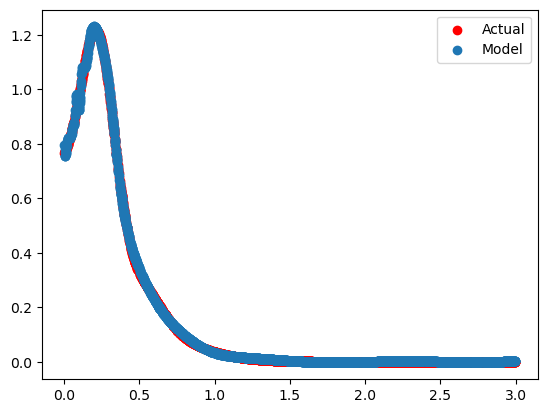

In [30]:
test_predict = dnn.predict(X_test)

# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=1/4)

# X_train_, X_test_, y_mean_train = scale(X_train, X_test, Y_train)


# dnn = NeuralNetwork(X_train, Y_train, 3, 32, tanh, tanh_deriv, epochs = 100, eta = 0.0001)
# dnn.layers[-1].sigma = linear
# dnn.layers[-1].sigma_d = linear_deriv

# test_predict_untrained = dnn.predict(X_test)
# dnn.train()
# test_predict_1 = dnn.predict(X_test)
print(test_predict.shape)
print(Y_test.shape)
plt.scatter(X_test[:, 1], Y_test, label="Actual", c="r")
plt.scatter(X_test[:, 1], test_predict[:, 0], label="Model")
# plt.scatter(X_test, test_predict_1[:, 0], label="Model")
# plt.scatter(X_test[:, 1], test_predict_1[:, 0], label="Model_untrained", marker="x", alpha=0.2)
# plt.scatter(X_test, Y_test, label="Actual", c="r")
# plt.scatter(X_test_, test_predict, label="Model", alpha = 0.5)
#plt.scatter(X_test, test_predict_untrained, label="Model_none")
plt.legend()
plt.show()

In [31]:
def MSE(y_data,y_model):
    n = np.size(y_model)
#     print(y_data.shape, y_model.shape)
    return np.sum((y_data-y_model)**2)/n

print(f"MSE Neural Network, tanh: {MSE(Y_test, test_predict[:, 0])}")

MSE Neural Network, tanh: 4.722003202791728e-05
